In [1]:
from functools import cached_property
from typing import Any, Dict, Tuple, TYPE_CHECKING

import cirq
import numpy as np
import quimb.tensor as qtn
from attrs import frozen
from numpy.typing import NDArray
from typing import * # TODO

from cirq_qubitization import cirq_infra
from cirq_qubitization.bloq_algos.and_bloq import And
from cirq_qubitization.bloq_algos.basic_gates import XGate, CNOT
from cirq_qubitization.bloq_algos.basic_gates.swap import CSwap
from cirq_qubitization.quantum_graph.bloq import Bloq
from cirq_qubitization.quantum_graph.composite_bloq import CompositeBloqBuilder, SoquetT
from cirq_qubitization.quantum_graph.fancy_registers import FancyRegister, FancyRegisters
from cirq_qubitization.quantum_graph.quantum_graph import Soquet
from cirq_qubitization.t_complexity_protocol import t_complexity, TComplexity

from cirq_qubitization.jupyter_tools import show_bloq

In [2]:
from cirq_qubitization.bloq_algos.unary_iteration import *
from cirq_qubitization.bloq_algos.unary_iteration import _unary_iteration_single_control, _unary_iteration_segtree

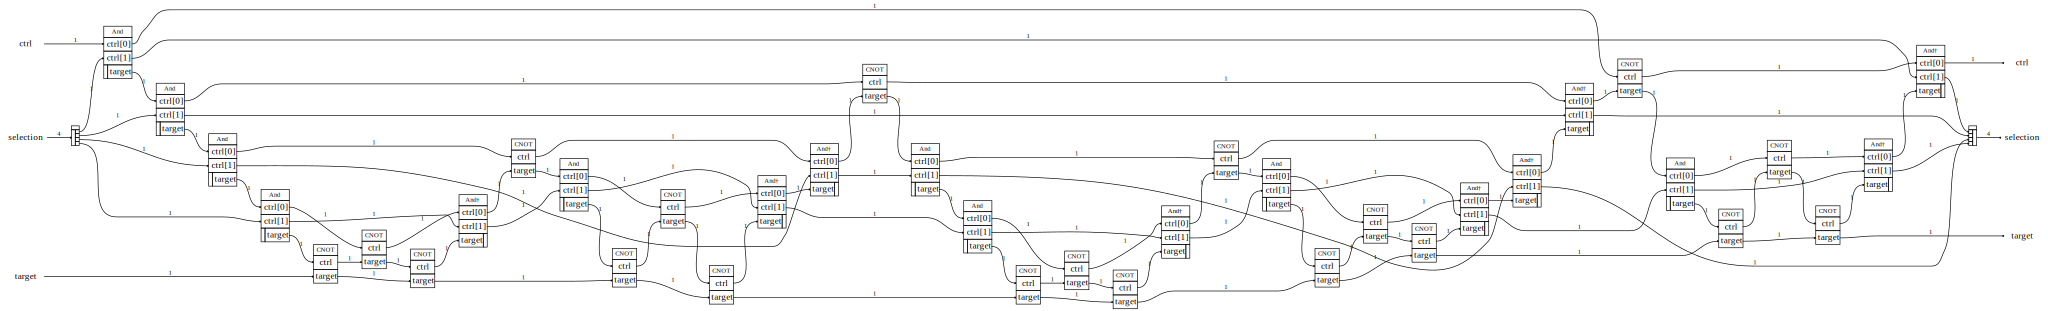

In [3]:
bb = CompositeBloqBuilder()
ctrl = bb.add_register('ctrl', 1)
selection = bb.add_register('selection', 4)
target = bb.add_register('target', 1)


def func(bb, l, ctrl):
    global target
    ctrl, target = bb.add(CNOT(), ctrl=ctrl, target=target)
    return ctrl

selection = bb.split(selection)
ctrl, selection = _unary_iteration_segtree(bb, func, ctrl, selection,0, 2**len(selection), 0, 10)
cbloq = bb.finalize(ctrl=ctrl, selection=bb.join(selection), target=target)
show_bloq(cbloq)

In [4]:
from cirq_qubitization.quantum_graph.musical_score import _cbloq_musical_score, draw, _binst_to_cxns
from cirq_qubitization.quantum_graph.musical_score import *
final_vals, soq_assign = _cbloq_musical_score(cbloq.registers, {}, cbloq._binst_graph)

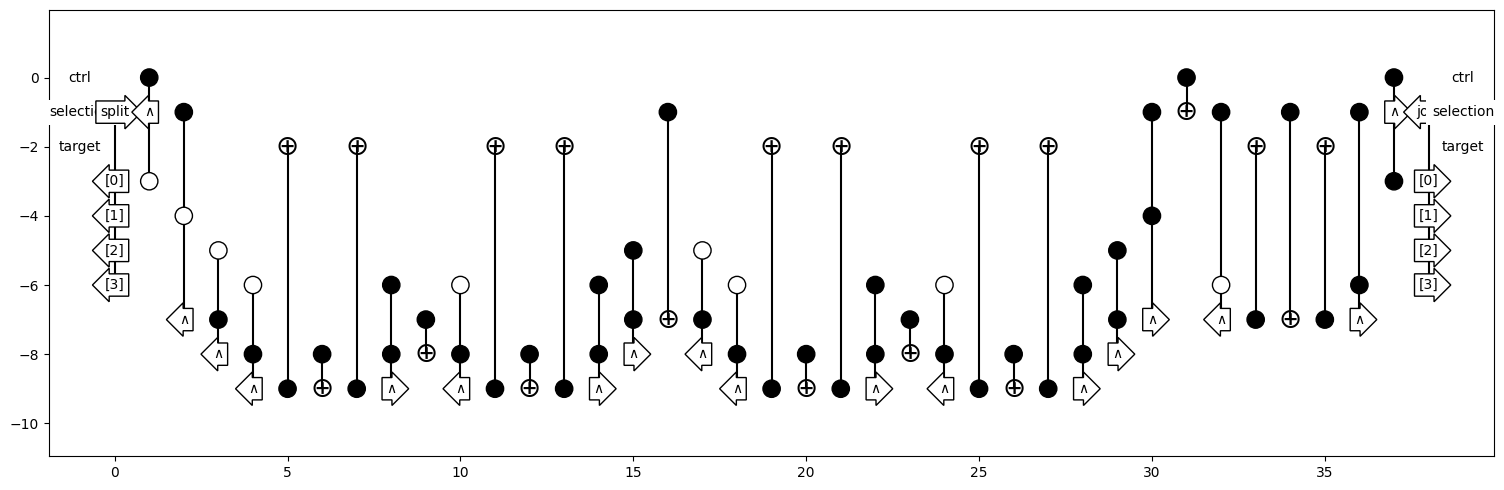

In [5]:
draw(cbloq, soq_assign)

In [6]:
import cirq_qubitization.cirq_infra.qubit_management_transformers as cqmt

In [7]:
circ, quregs = cbloq.to_cirq_circuit(**cbloq.registers.get_cirq_quregs())
circ = cqmt.map_clean_and_borrowable_qubits(circ)

from cirq.contrib.svg import SVGCircuit
import cirq.contrib.svg.svg as ccsvg
import IPython.display

qubits = {str(q): q for q in circ.all_qubits()}
qubits

{'ancilla_0': cirq.NamedQubit('ancilla_0'),
 'selection3': cirq.NamedQubit('selection3'),
 'ancilla_3': cirq.NamedQubit('ancilla_3'),
 'ancilla_2': cirq.NamedQubit('ancilla_2'),
 'selection2': cirq.NamedQubit('selection2'),
 'selection1': cirq.NamedQubit('selection1'),
 'ctrl': cirq.NamedQubit('ctrl'),
 'selection0': cirq.NamedQubit('selection0'),
 'target': cirq.NamedQubit('target'),
 'ancilla_1': cirq.NamedQubit('ancilla_1')}

In [8]:
qnames = sum([[f'selection{i}', f'ancilla_{i}'] for i in range(4)], [])
qnames

['selection0',
 'ancilla_0',
 'selection1',
 'ancilla_1',
 'selection2',
 'ancilla_2',
 'selection3',
 'ancilla_3']

findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.


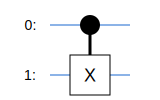

In [9]:
q0, q1 = cirq.LineQubit.range(2)
SVGCircuit(cirq.Circuit(cirq.CNOT(q0, q1)))

In [10]:
qubit_order = [qubits[name] for name in ['ctrl'] + qnames + []]
tdd = circ.to_text_diagram_drawer(transpose=False, qubit_order=qubit_order)
IPython.display.SVG(ccsvg.tdd_to_svg(tdd))

ValueError: Unexpected extra qubits: {cirq.NamedQubit('target')}.